http://scipy-cookbook.readthedocs.io/items/SavitzkyGolay.html
http://scipy.github.io/devdocs/generated/scipy.signal.savgol_filter.html#scipy.signal.savgol_filter

In [1]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%matplotlib inline

In [2]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    """
    Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    """ 
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
        
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
        
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
        
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

### Example 1

In [6]:
WINDOW_LENGTH = 11
DEGREE = 2
NOISE = 0.5

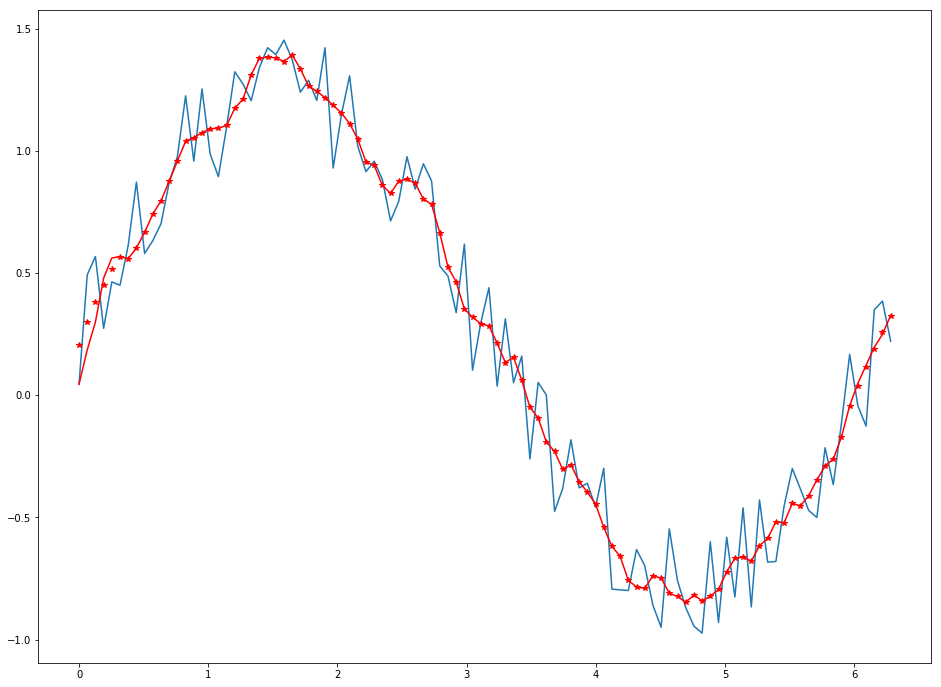

CPU times: user 175 ms, sys: 10.7 ms, total: 186 ms
Wall time: 182 ms


In [7]:
%%time

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * NOISE
yhat = savitzky_golay(y, WINDOW_LENGTH, DEGREE) # window size 51, polynomial order 3. Min win size 11, min order 2
yscipy = savgol_filter(y, WINDOW_LENGTH, DEGREE)

plt.figure(figsize=(16,12))
plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.plot(x,yscipy, 'r*')
plt.show()

### Example 2

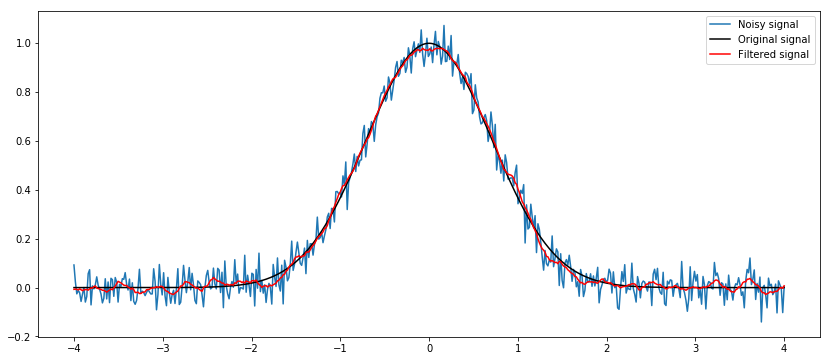

In [5]:
t = np.linspace(-4, 4, 500)
y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
ysg = savitzky_golay(y, window_size=31, order=4)

plt.figure(figsize=(14,6))
plt.plot(t, y, label='Noisy signal')
plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
plt.plot(t, ysg, 'r', label='Filtered signal')
plt.legend()
plt.show()